In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.5.0
matplotlib 3.3.4
numpy 1.19.5
pandas 1.2.4
sklearn 0.24.1
tensorflow 2.5.0
tensorflow.keras 2.5.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [4]:
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(np.max(x_train), np.min(x_train))

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)
255 0


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [6]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train_scaled, y_train, epochs=10,
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4579 - accuracy: 0.8330 - val_loss: 0.3695 - val_accuracy: 0.8656
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3516 - accuracy: 0.8692 - val_loss: 0.3881 - val_accuracy: 0.8638
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3164 - accuracy: 0.8824 - val_loss: 0.3260 - val_accuracy: 0.8800
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2918 - accuracy: 0.8901 - val_loss: 0.3618 - val_accuracy: 0.8712
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.8971 - val_loss: 0.3255 - val_accuracy: 0.8868
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2565 - accuracy: 0.9027 - val_loss: 0.3198 - val_accuracy: 0.8856
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2433 - accuracy: 0.9071 - val_loss: 0.3135 - val_accuracy:

In [9]:
def plot_learning_curver(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

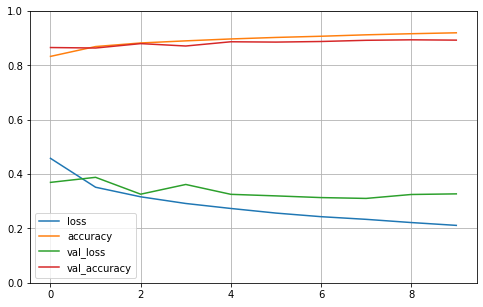

In [10]:
plot_learning_curver(history)

In [11]:
model.evaluate(x_test_scaled, y_test, verbose=2)

313/313 - 0s - loss: 0.3605 - accuracy: 0.8843


[0.3605046272277832, 0.8842999935150146]

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [13]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


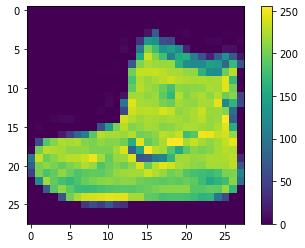

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

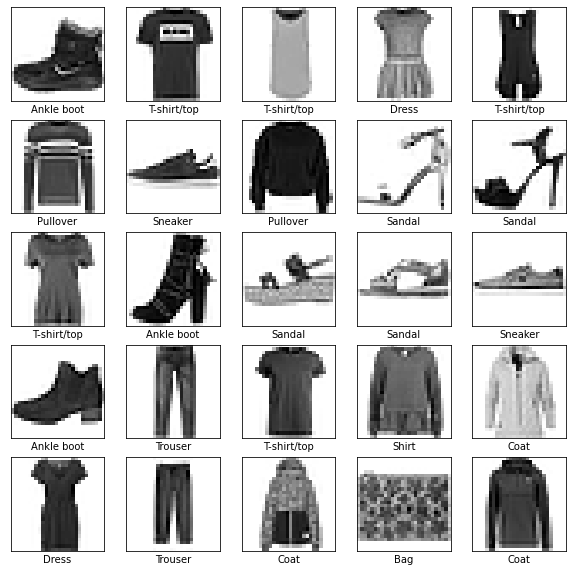

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape=[28, 28]),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4960 - accuracy: 0.8260
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3731 - accuracy: 0.8649
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3369 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3123 - accuracy: 0.8865
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2941 - accuracy: 0.8920


In [20]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3485 - accuracy: 0.8728


[0.34850767254829407, 0.8727999925613403]

In [21]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[1.5453146e-06 6.9066566e-08 4.0983639e-07 6.6244232e-10 5.3564544e-09
 2.8680123e-03 2.0951808e-07 7.3316670e-03 1.1731561e-06 9.8979694e-01]
9
9


In [22]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

In [23]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

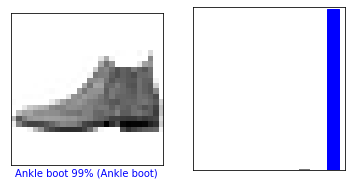

In [24]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

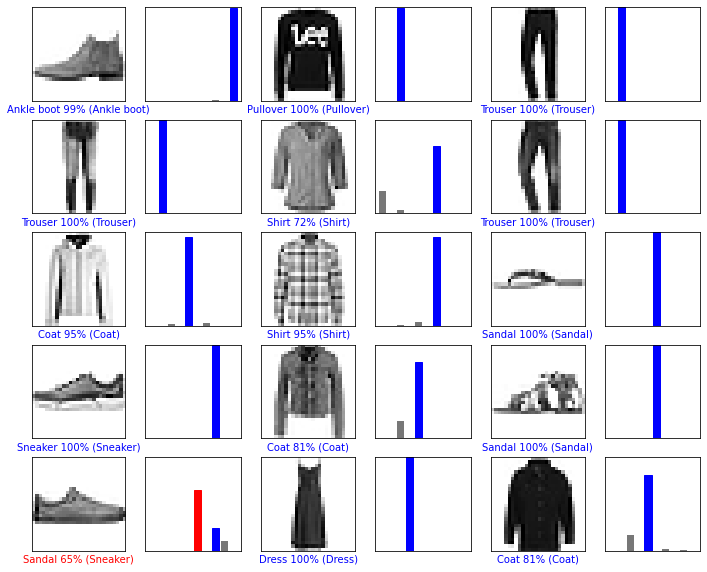

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

img = test_images[0]

img = (np.expand_dims(img, 0))

In [26]:
print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.5453146e-06 6.9066566e-08 4.0983639e-07 6.6244232e-10 5.3564544e-09
  2.8680123e-03 2.0951808e-07 7.3316670e-03 1.1731561e-06 9.8979694e-01]]


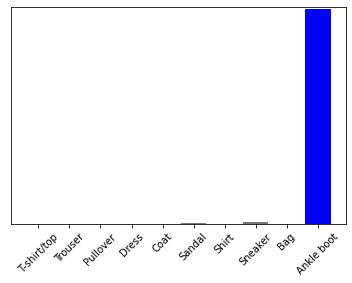

In [28]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [30]:
print(tf.__version__)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

2.5.0
matplotlib 3.3.4
numpy 1.19.5
pandas 1.2.4
sklearn 0.24.1
tensorflow 2.5.0
tensorflow.keras 2.5.0


In [31]:
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


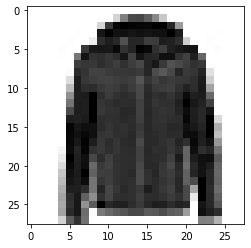

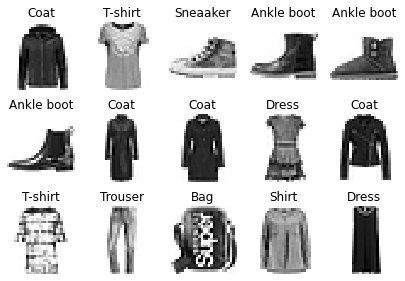

In [32]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()


show_single_image(x_train[0])


def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap='binary',
                       interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()


class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaaker',
               'Bag', "Ankle boot"]
show_imgs(3, 5, x_train, y_train, class_names)

In [33]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [34]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
print(model.layers)

[<tensorflow.python.keras.layers.core.Flatten object at 0x0000018A6FAE21C0>, <tensorflow.python.keras.layers.core.Dense object at 0x0000018B2E750A60>, <tensorflow.python.keras.layers.core.Dense object at 0x0000018AA8011A00>, <tensorflow.python.keras.layers.core.Dense object at 0x0000018AA8011D00>]


In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.8803 - accuracy: 0.6836 - val_loss: 0.6937 - val_accuracy: 0.7304
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6208 - accuracy: 0.7587 - val_loss: 0.5731 - val_accuracy: 0.7958
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5212 - accuracy: 0.8156 - val_loss: 0.5141 - val_accuracy: 0.8150
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4750 - accuracy: 0.8337 - val_loss: 0.5056 - val_accuracy: 0.8212
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4533 - accuracy: 0.8418 - val_loss: 0.4924 - val_accuracy: 0.8266
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4328 - accuracy: 0.8510 - val_loss: 0.4039 - val_accuracy: 0.8650
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4036 - accuracy: 0.8589 - val_loss: 0.3883 - val_accuracy:

In [38]:
type(history)

tensorflow.python.keras.callbacks.History

In [39]:
print(history.history)

{'loss': [1.8803393840789795, 0.6207793951034546, 0.521239161491394, 0.4750034809112549, 0.4533277451992035, 0.43283385038375854, 0.4035867154598236, 0.3876584768295288, 0.3760879933834076, 0.3634098470211029], 'accuracy': [0.6836000084877014, 0.7586908936500549, 0.8156363368034363, 0.8337273001670837, 0.8418363928794861, 0.8509636521339417, 0.8589454293251038, 0.8633818030357361, 0.8674545288085938, 0.8706545233726501], 'val_loss': [0.693743109703064, 0.5731486082077026, 0.5141071081161499, 0.5056468844413757, 0.4924021363258362, 0.403907835483551, 0.3882869780063629, 0.4270453155040741, 0.41574469208717346, 0.42332881689071655], 'val_accuracy': [0.730400025844574, 0.795799970626831, 0.8149999976158142, 0.8212000131607056, 0.8266000151634216, 0.8650000095367432, 0.8722000122070312, 0.8543999791145325, 0.8619999885559082, 0.8582000136375427]}


In [40]:
def plot_learning_curver(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

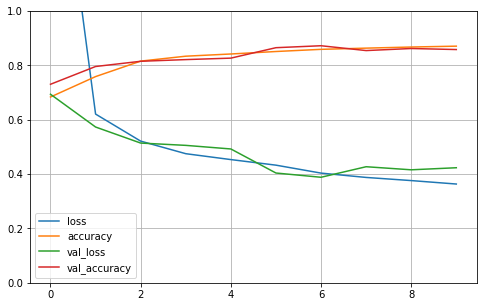

In [41]:
plot_learning_curver(history)

plt.show()

In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [43]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_lables) = fashion_mnist.load_data()

In [44]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_lables))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


In [45]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4967 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3734 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3357 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3128 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2947 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2811 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2700 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2587 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2488 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.240

In [49]:
test_loss, test_acc = model.evaluate(test_images, test_lables)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.8840
0.8840000033378601


In [50]:
predictions = model.predict(test_images)
print(predictions[0])

[1.1272462e-09 1.2275506e-09 3.5294370e-10 1.2534330e-11 6.4391936e-10
 1.6421215e-03 9.2870856e-08 1.3064135e-02 4.4692067e-10 9.8529369e-01]


In [51]:
print(np.argmax(predictions[0]))
print(test_lables[0])

9
9


In [52]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [53]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [54]:
train_images = np.expand_dims(train_images, -1)
print(train_images.shape)

(60000, 28, 28, 1)


In [55]:
test_images = np.expand_dims(test_images, -1)
print(test_images.shape)

(10000, 28, 28, 1)


In [56]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=train_images.shape[1:], activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [57]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)        

In [58]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )

In [59]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 22s 10ms/step - loss: 0.7125 - acc: 0.7435 - val_loss: 0.4382 - val_acc: 0.8450
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4082 - acc: 0.8502 - val_loss: 0.3496 - val_acc: 0.8758
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3520 - acc: 0.8709 - val_loss: 0.3298 - val_acc: 0.8800
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3234 - acc: 0.8814 - val_loss: 0.3108 - val_acc: 0.8813
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3019 - acc: 0.8885 - val_loss: 0.3131 - val_acc: 0.8889


In [60]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


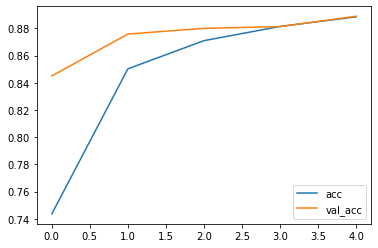

In [61]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()
plt.show()

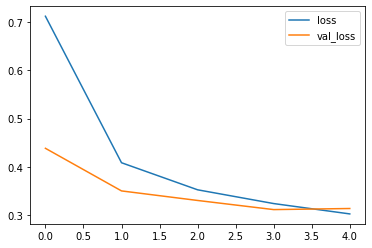

In [62]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()